# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [79]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [80]:
# Set the API base URL
units = 'metric'
url = "http://api.openweathermap.org/data/2.5/weather?"
    

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # # Add 1 to the record count
    record_count += 1
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    # # Run an API request for each of the cities
    try:
#         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather ['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date =  city_weather['dt']

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | tofol
Processing Record 3 of Set 1 | aasiaat
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | vilyuysk
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | thunder bay
Processing Record 19 of Set 1 | flying fish cove
Processing Record 20 of Set 1 | kavieng
Processing Record 21 of Set 1 | namibe
Processing Record 22 of Set 1 | isa

In [81]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [82]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,-17.72,84,75,5.00,RU,1709005809
1,tofol,5.3248,163.0078,27.88,83,75,1.54,FM,1709005810
2,aasiaat,68.7098,-52.8699,-19.35,98,100,4.50,GL,1709005810
3,longyearbyen,78.2186,15.6401,-8.09,73,75,2.57,SJ,1709005810
4,edinburgh of the seven seas,-37.0676,-12.3116,15.28,88,100,12.30,SH,1709005810
...,...,...,...,...,...,...,...,...,...
546,sinabang,2.4803,96.3801,30.28,67,31,1.51,ID,1709005912
547,mutuali,-14.8706,37.0044,20.80,99,100,0.80,MZ,1709005912
548,argostolion,38.1811,20.4890,12.64,75,95,1.71,GR,1709005912
549,itaguacu,-19.8019,-40.8556,21.48,97,15,0.69,BR,1709005912


In [83]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [84]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-17.72,84,75,5.00,RU,1709005809
1,tofol,5.3248,163.0078,27.88,83,75,1.54,FM,1709005810
2,aasiaat,68.7098,-52.8699,-19.35,98,100,4.50,GL,1709005810
3,longyearbyen,78.2186,15.6401,-8.09,73,75,2.57,SJ,1709005810
4,edinburgh of the seven seas,-37.0676,-12.3116,15.28,88,100,12.30,SH,1709005810
...,...,...,...,...,...,...,...,...,...
546,sinabang,2.4803,96.3801,30.28,67,31,1.51,ID,1709005912
547,mutuali,-14.8706,37.0044,20.80,99,100,0.80,MZ,1709005912
548,argostolion,38.1811,20.4890,12.64,75,95,1.71,GR,1709005912


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

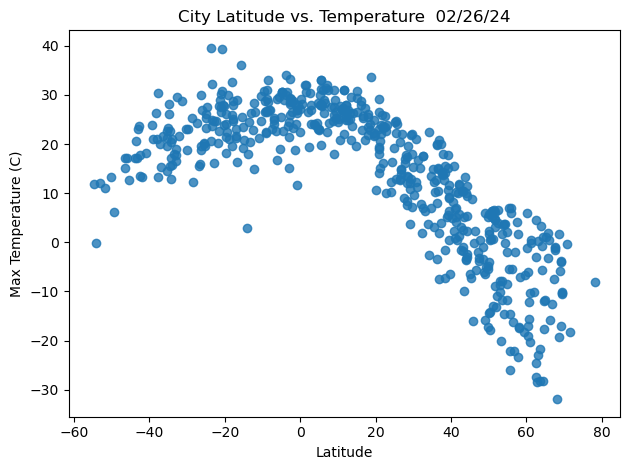

In [86]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha = 0.8)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature  " +  time.strftime("%x"))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

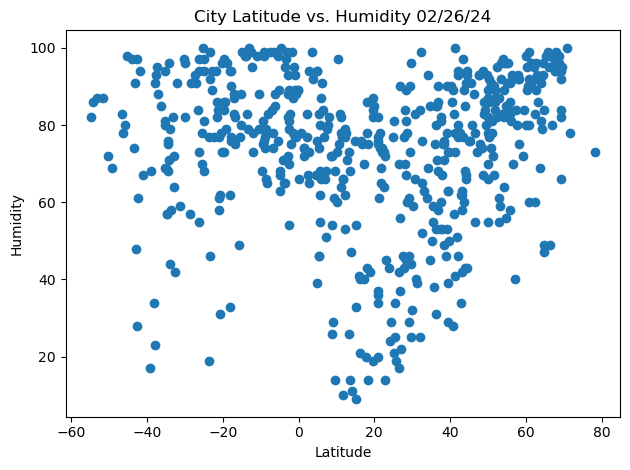

In [87]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

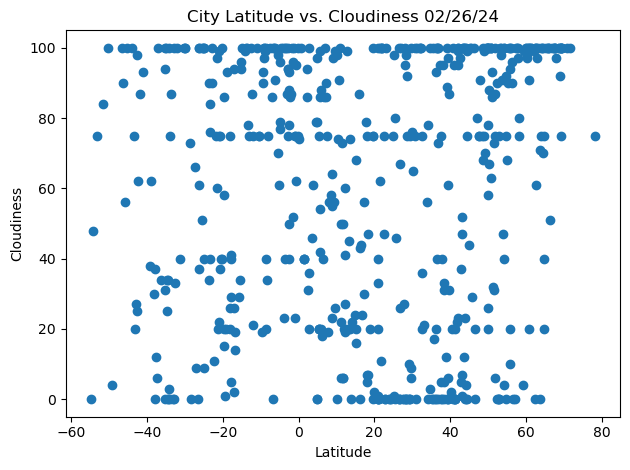

In [88]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

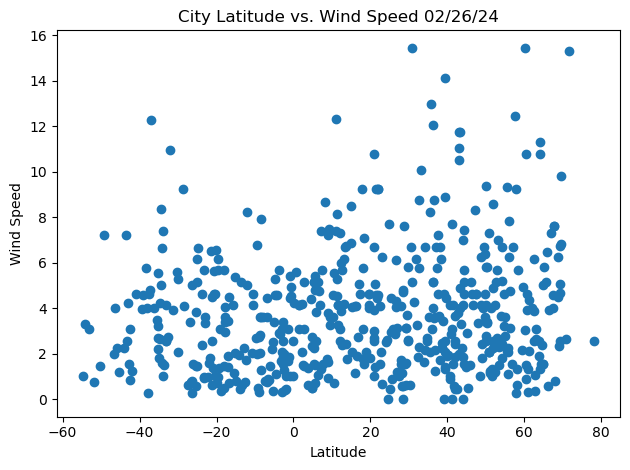

In [89]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df['Lat']) >= 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-17.72,84,75,5.00,RU,1709005809
1,tofol,5.3248,163.0078,27.88,83,75,1.54,FM,1709005810
2,aasiaat,68.7098,-52.8699,-19.35,98,100,4.50,GL,1709005810
3,longyearbyen,78.2186,15.6401,-8.09,73,75,2.57,SJ,1709005810
6,iqaluit,63.7506,-68.5145,-28.15,69,0,2.57,CA,1709005811


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df['Lat']) < 0, :]

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,edinburgh of the seven seas,-37.0676,-12.3116,15.28,88,100,12.30,SH,1709005810
5,papatowai,-46.5619,169.4708,15.13,83,100,2.00,NZ,1709005811
9,grytviken,-54.2811,-36.5092,-0.05,86,48,3.30,GS,1709005811
10,hermanus,-34.4187,19.2345,17.11,76,0,8.36,ZA,1709005811
11,port-aux-francais,-49.3500,70.2167,6.06,69,4,7.23,TF,1709005811
...,...,...,...,...,...,...,...,...,...
539,mahuta,-10.8667,39.4500,21.31,98,100,2.02,TZ,1709005911
540,villa berthet,-27.2917,-60.4126,24.28,93,66,0.64,AR,1709005911
543,valparaiso,-33.0393,-71.6273,17.80,82,0,2.57,CL,1709005670


###  Temperature vs. Latitude Linear Regression Plot

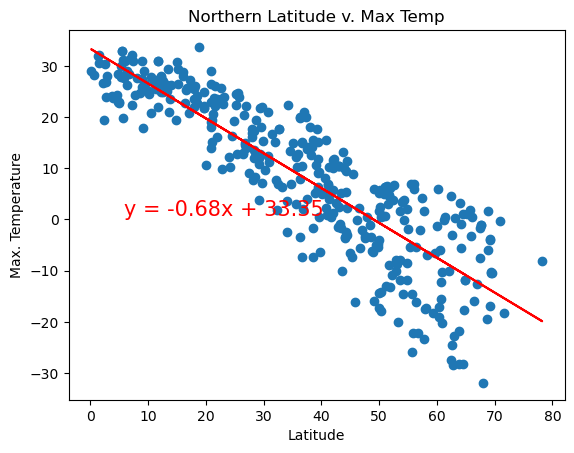

In [92]:
# Linear regression on Northern Hemisphere
x_1 = northern_hemi_df['Lat']
y_1 = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_1, y_1)
regress_values = x_1* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_1, y_1)
plt.plot(x_1,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature')
plt.title('Northern Latitude v. Max Temp')
plt.show()


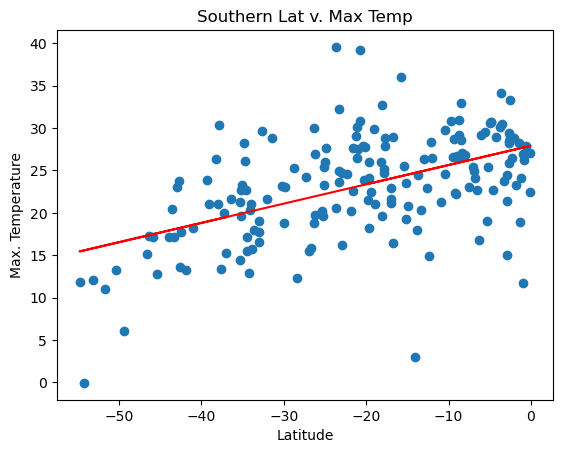

In [93]:
# Linear regression on Southern Hemisphere
x_2 = southern_hemi_df['Lat']
y_2 = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_2, y_2)
regress_values = x_2* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_2, y_2)
plt.plot(x_2,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature')
plt.title('Southern Lat v. Max Temp')
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere there is a negative correlation between latitude and max temperature where as latitude rises, temperature goes down. In contast, in the Southern Hemisphere, there is a positive correlation where as latitude rises, temperature does as well. 

### Humidity vs. Latitude Linear Regression Plot

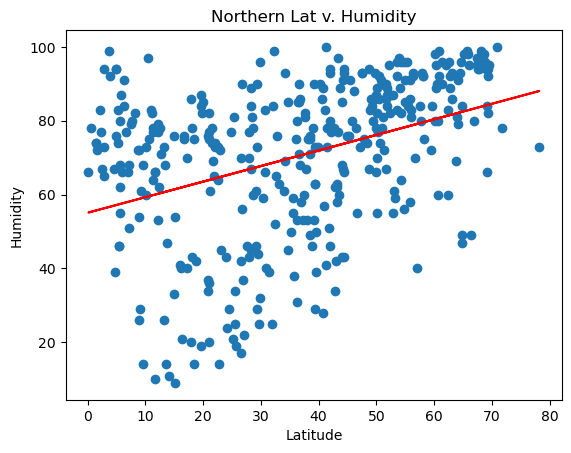

In [94]:
# Northern Hemisphere
x_1 = northern_hemi_df['Lat']
y_1 = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_1, y_1)
regress_values = x_1* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_1, y_1)
plt.plot(x_1,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Lat v. Humidity')
plt.show()

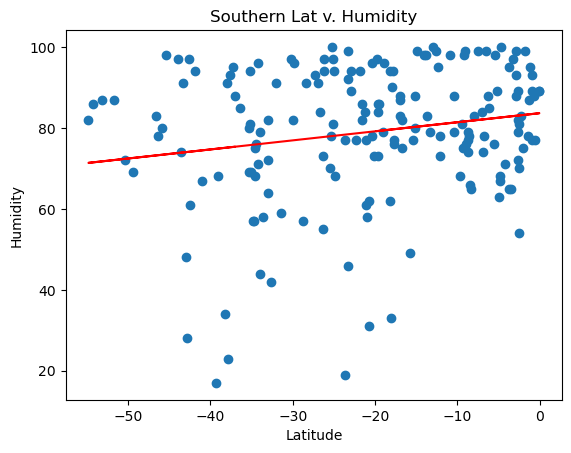

In [95]:
# Southern Hemisphere
x_2 = southern_hemi_df['Lat']
y_2 = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_2, y_2)
regress_values = x_2* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_2, y_2)
plt.plot(x_2,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Lat v. Humidity')
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere there appears to be a positive correlation where humidity rises as latitude rises. In the Southern Hemisphere, there is a slight positive correlation between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

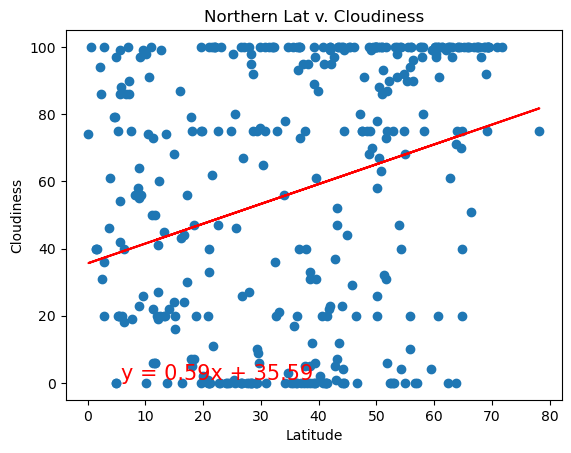

In [96]:
# Northern Hemisphere
x_1 = northern_hemi_df['Lat']
y_1 = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_1, y_1)
regress_values = x_1* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_1, y_1)
plt.plot(x_1,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Lat v. Cloudiness')
plt.show()

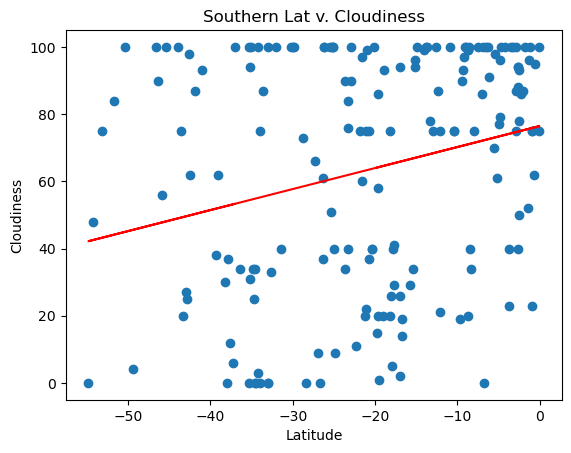

In [97]:
# Southern Hemisphere
x_2 = southern_hemi_df['Lat']
y_2 = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_2, y_2)
regress_values = x_2* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_2, y_2)
plt.plot(x_2,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Lat v. Cloudiness')
plt.show()

**Discussion about the linear relationship:** For both hemispheres there is a positive correlation with cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

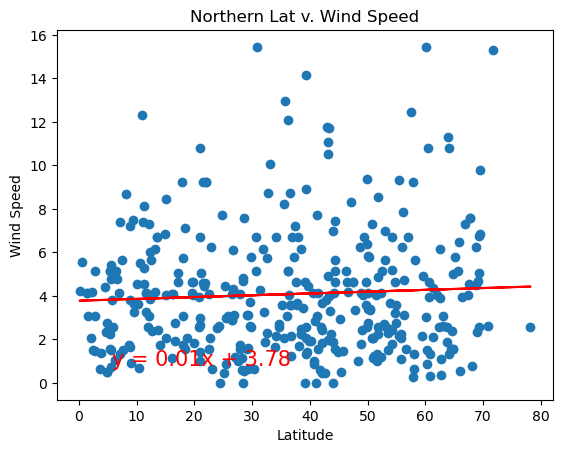

In [98]:
# Northern Hemisphere
x_1 = northern_hemi_df['Lat']
y_1 = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_1, y_1)
regress_values = x_1* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_1, y_1)
plt.plot(x_1,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Lat v. Wind Speed')
plt.show()

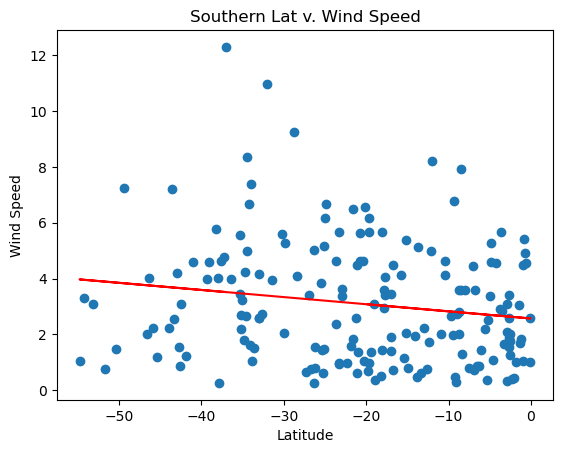

In [99]:
# Southern Hemisphere
x_2 = southern_hemi_df['Lat']
y_2 = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_2, y_2)
regress_values = x_2* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_2, y_2)
plt.plot(x_2,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Lat v. Wind Speed')
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere there is no correlation between latitude and wind speed. For the Southern Hemisphere there is a slight negative correlation with latitude and wind speed. 